Loading data


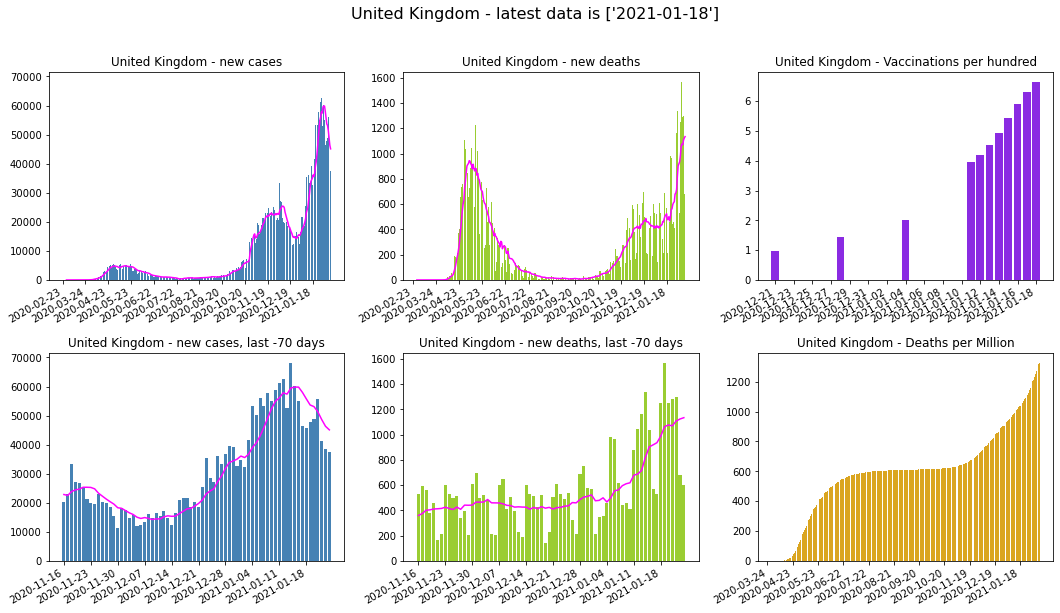

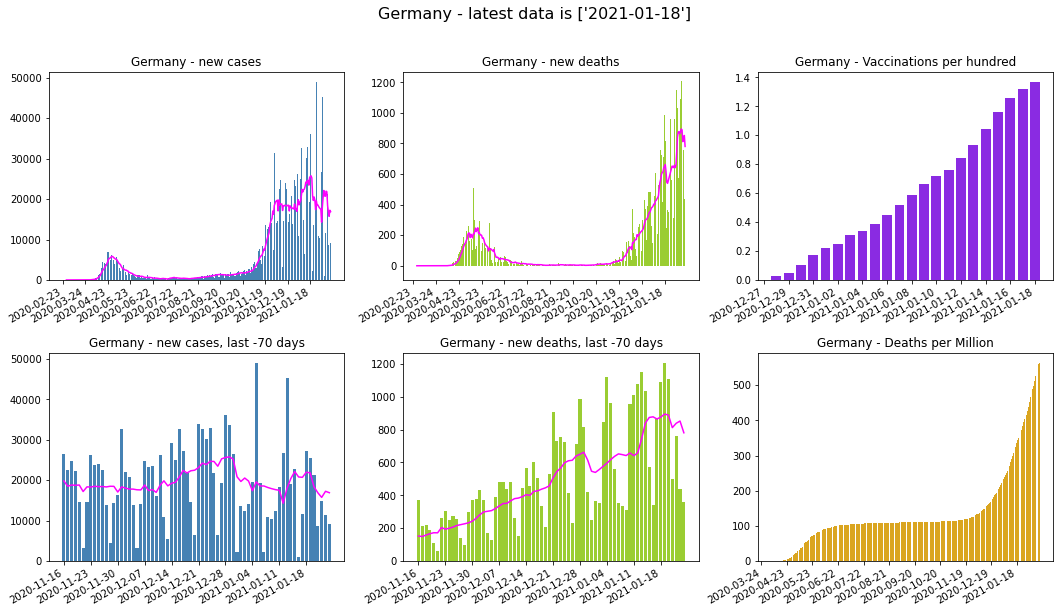

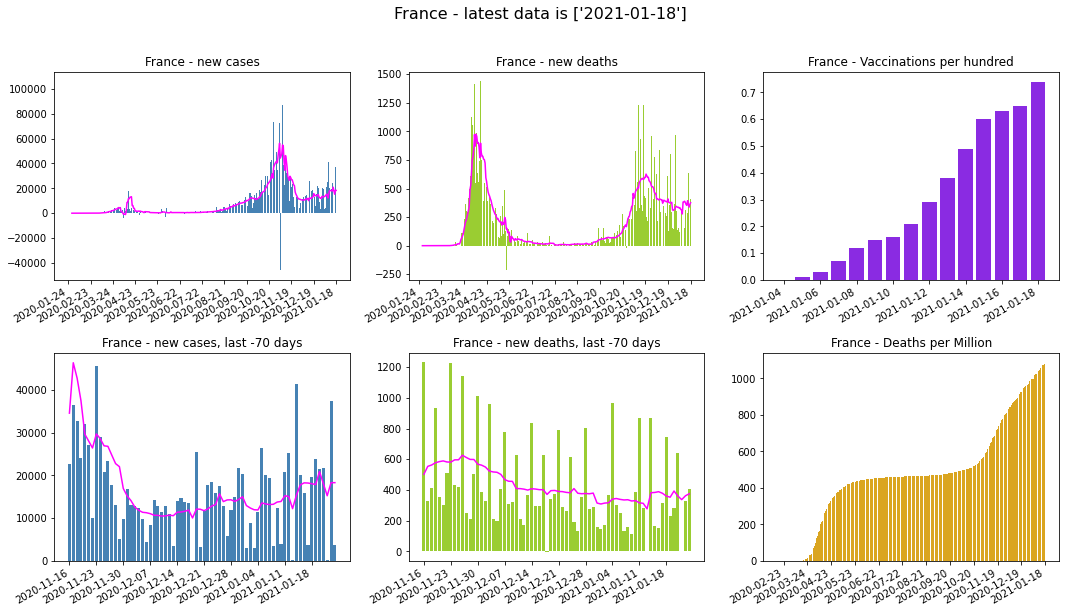

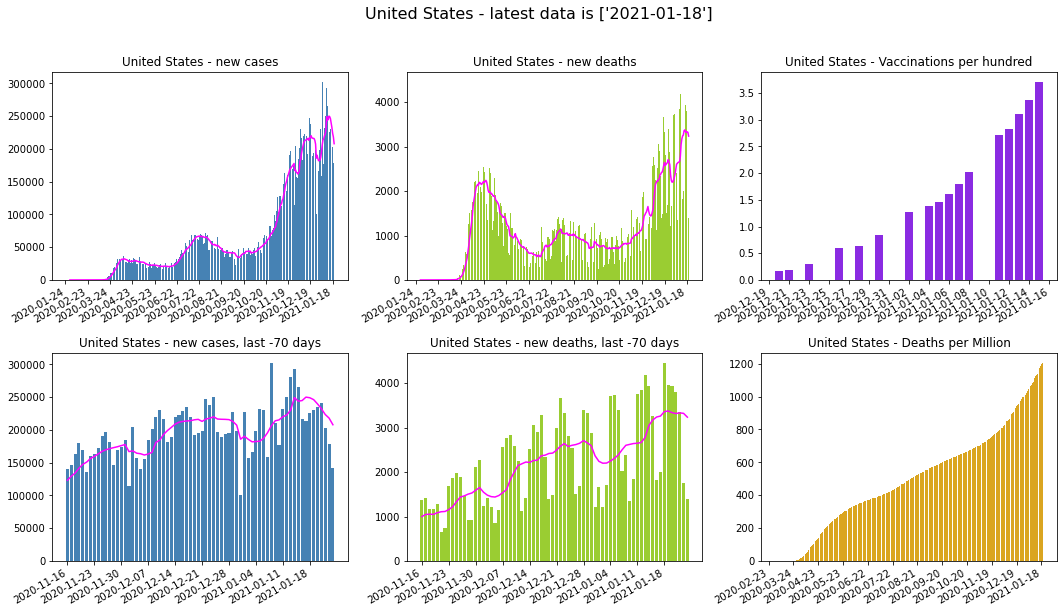

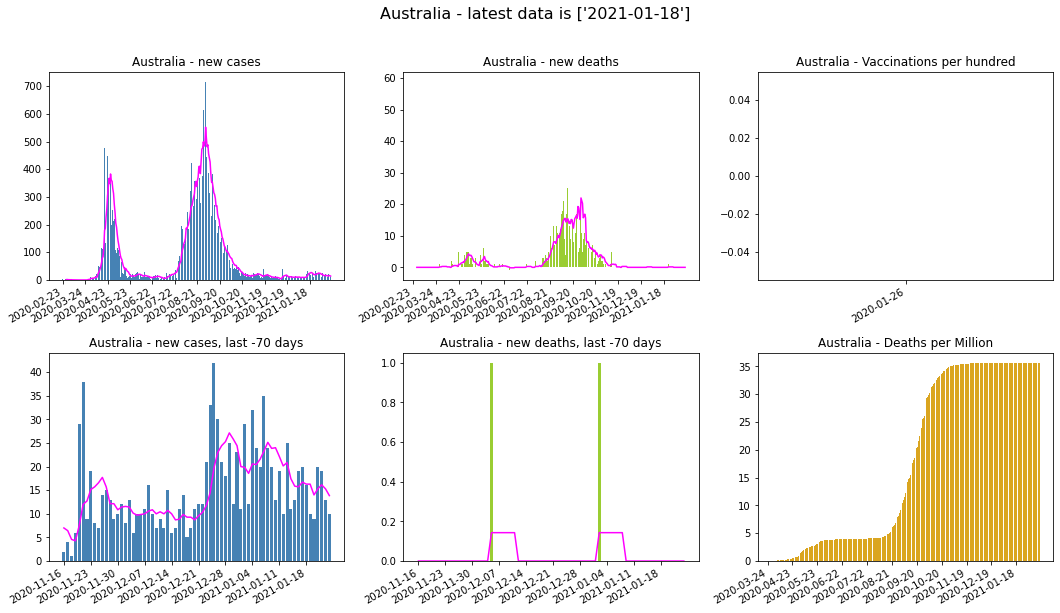

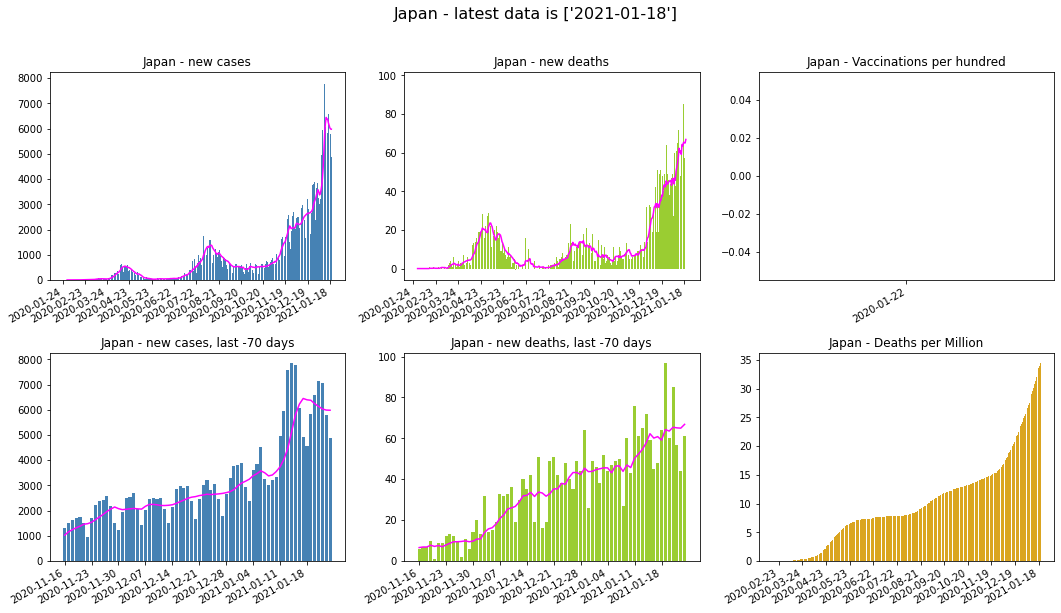

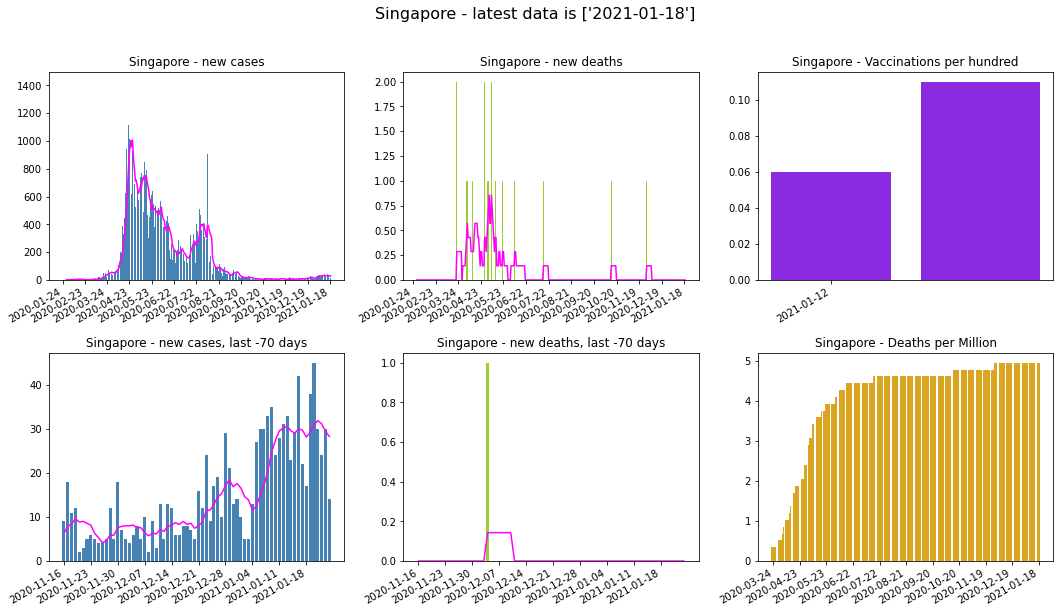

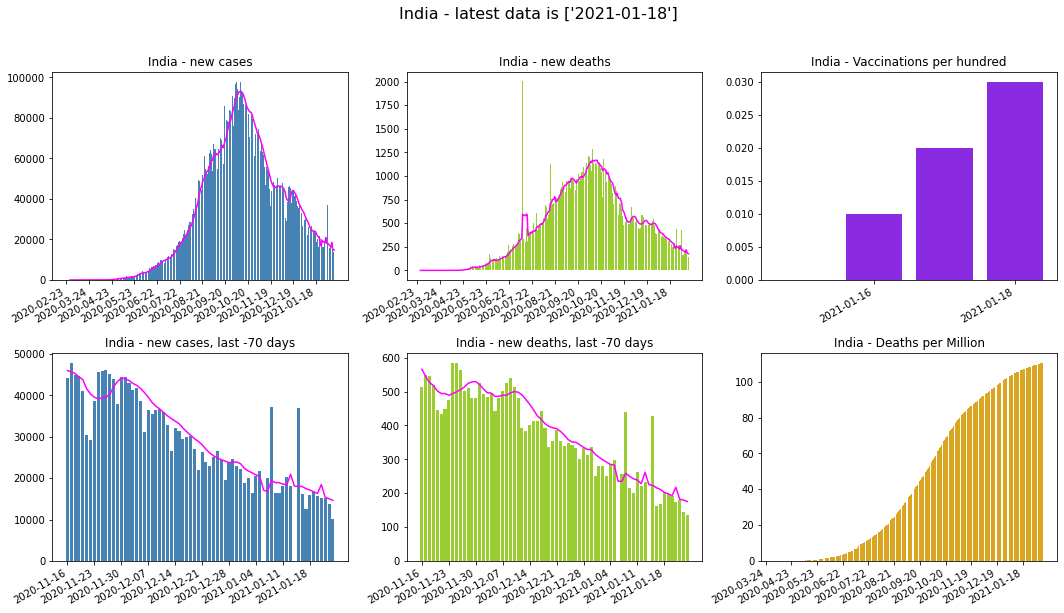

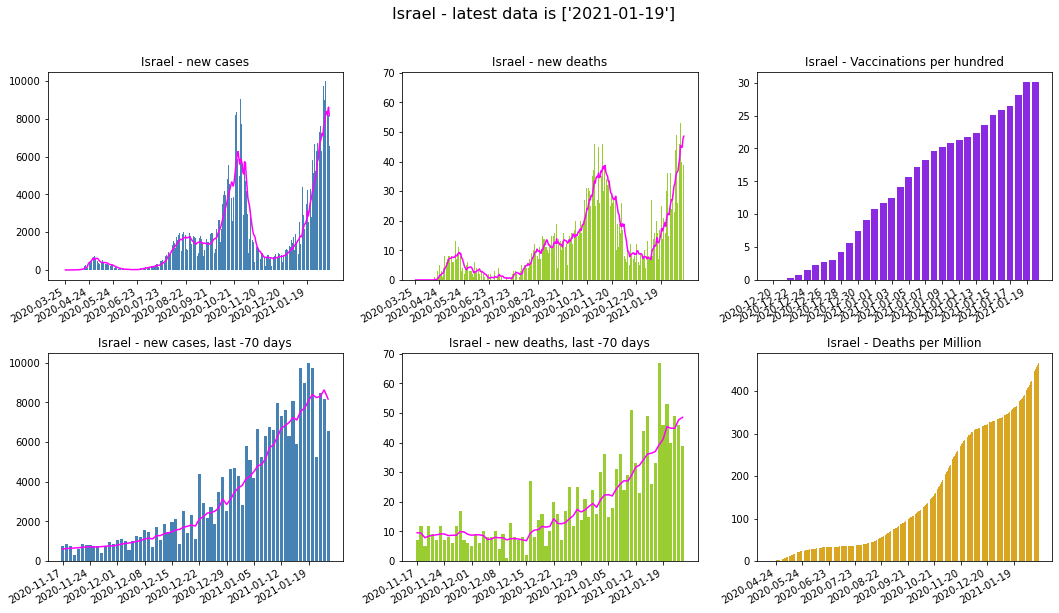

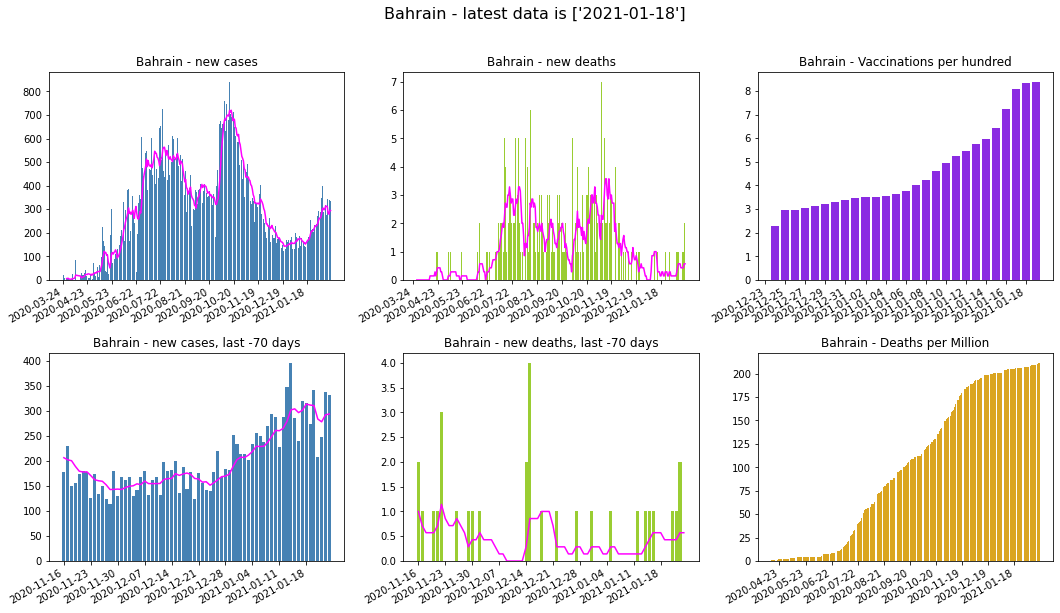

In [2]:
# Data from https://covid.ourworldindata.org/data/owid-covid-data.csv

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pathlib import Path

downloads = f'{Path.home()}\\Downloads'

ageData = dt.timedelta(hours=1, minutes=0)    # this sets up how old the data can be before we load it again.
try:
    if dataStamp + ageData < dt.datetime.today():
        load = True
        print('Data will be reloaded')
    else:
        load = False
        print(f'Data already loaded: {dataStamp.strftime("%b-%d %H:%M")}')
except:
    load = True

# Load the data
if load:
    print('Loading data')
    df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    dataStamp = dt.datetime.today()

df.sort_values(by = 'date', inplace=True)    # Make sure it is in date order.

xrot = 30    # this just shifts the date labels so they can be read

# list the iso country codes that we want to report on
for country in ['GBR', 'DEU', 'FRA', 'USA', 'AUS', 'JPN', 'SGP', 'IND', 'ISR', 'BHR']:
    df1 = df[df.iso_code == country]    # subset the data
    for name in df[df.iso_code == country]['location'][0:1]:
        pass     # just pass the name back
    x = []    # setup an empty array for the X values
    for date in df1.date.tolist():    # pop each date into the x-axis
        x.append(date)
    
    plt.rcParams["figure.figsize"] = (18,9)    # Create the Plot size
    fig , ax = plt.subplots(2,3)    # Create the plot space
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35) # add horizontal spacing
    fig.suptitle(f"{name} - latest data is {x[-1:]}", fontsize=16)    # title the figure
    
    ticks = []    # empty array of tick positions
    i, step = 0, 30    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position
    y1 = df1.new_cases    # set the y axis values
    y2 = df1.new_cases_smoothed
    y3 = df1.new_deaths
    y4 = df1.new_deaths_smoothed
    y5 = df1.total_vaccinations_per_hundred
    y6 = df1.total_deaths_per_million
    
    plt.subplot(231)    # top left
    plt.title(f"{name} - new cases")
#    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y1, color='steelblue')
    plt.plot(x, y2, color='magenta')

    plt.subplot(232)    # top centre
    plt.title(f"{name} - new deaths")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y3, color='yellowgreen')
    plt.plot(x, y4, color='magenta')

    plt.subplot(236)    # bottom right
    plt.title(f"{name} - Deaths per Million")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y6, color='goldenrod')

    ### This is for the vaccinations, as we have less data we need more frequent data labels. 
    ticks = []    # empty array of tick positions
    i, step = 0, 2    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position

    plt.subplot(233)    # top right
    plt.title(f"{name} - Vaccinations per hundred")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
#    plt.xticks(rotation=xrot)
    plt.bar(x, y5, color='blueviolet')

    ### This section just slices the same date but only the last 35 values
    recent = -70    # this sets the look back value
    i, step = 0, 7
    ticks = []
    for tick in x[recent::step]:
        ticks.append(i)
        i += step

    plt.subplot(234)    # bottom left
    plt.title(f"{name} - new cases, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x[recent:], y1[recent:], color='steelblue')
    plt.plot(x[recent:], y2[recent:], color='magenta')

    plt.subplot(235)    # bottom centre
    plt.title(f"{name} - new deaths, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x[recent:], y3[recent:], color='yellowgreen')
    plt.plot(x[recent:], y4[recent:], color='magenta')

    fig.savefig(f'{downloads}\\{country}_OWD.png')

ARG


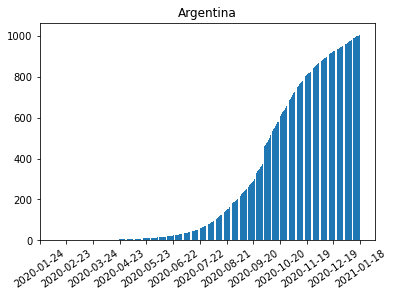

In [3]:
i = 0
for country in df.iso_code.unique():
    print(country)
    if pd.isna(country):
        pass
    else:
        df1 = df.loc[df.iso_code == country]
        plt.rcParams["figure.figsize"] = (6,4)
        plt.bar(df1.date, df1.total_deaths_per_million)
        plt.xticks(df1.date[-(df1.date.size//30) * 30 -1 ::30] ,  rotation=35)
        plt.title(df1.location.unique()[0])
        plt.show()
        i += 1
    if i == 1: break

In [4]:
for code in df.iso_code.unique():
    if not pd.isna(code):
        print(code)

ARG
MEX
THA
TWN
KOR
USA
JPN
CHN
OWID_WRL
VNM
SGP
FRA
CHE
MYS
NPL
ISR
AUS
CAN
DEU
DNK
KHM
LKA
FIN
ARE
FJI
IND
PHL
RUS
GBR
ITA
HKG
ESP
SWE
CZE
GRC
LVA
SVN
PRT
BEL
MLT
ZAF
MAR
EGY
NLD
GTM
IRN
LBN
CHL
LTU
NOR
OMN
LUX
IRQ
BHR
KWT
AFG
DZA
HRV
PAK
AUT
BRA
MKD
GEO
ROU
EST
SRB
ISL
SMR
BLR
SEN
NZL
NGA
IRL
MCO
QAT
AZE
DOM
ECU
ARM
AND
IDN
SAU
BGD
UKR
JOR
TGO
HUN
TUN
POL
LIE
LBY
BIH
PSE
BTN
VAT
CMR
SVK
PER
CRI
COL
KEN
PRY
MDA
MDV
BGR
BRN
ALB
PAN
CYP
MNG
BFA
TUR
HND
COD
JAM
CIV
BOL
GUY
CUB
ATG
ETH
URY
GIN
SDN
KAZ
SWZ
RWA
GAB
NAM
LCA
OWID_KOS
SUR
VEN
SYC
VCT
GHA
TTO
MRT
UZB
COG
CAF
GNQ
LBR
BEN
BHS
SOM
TZA
MNE
GMB
BRB
MUS
ZMB
KGZ
DJI
NIC
SLV
TCD
HTI
CPV
AGO
PNG
MDG
ZWE
NER
ERI
UGA
GRD
MOZ
DMA
SYR
TLS
BLZ
LAO
MLI
KNA
GNB
MMR
MWI
BWA
SLE
BDI
SSD
STP
YEM
COM
TJK
LSO
SLB
MHL
VUT
WSM


In [5]:
df = df.loc[df.iso_code != 'OWID_WRL']
for item in ['total_vaccinations_per_hundred', 'total_deaths_per_million', 'total_cases_per_million',
            'icu_patients_per_million', 'total_tests_per_thousand', 'new_deaths_per_million']:
    print('####')
    print(df.loc[df[item].idxmax()][['location',item]])

####
location                          Israel
total_vaccinations_per_hundred     30.14
Name: 26924, dtype: object
####
location                    San Marino
total_deaths_per_million       1915.26
Name: 46688, dtype: object
####
location                   Andorra
total_cases_per_million     117556
Name: 1296, dtype: object
####
location                    Belgium
icu_patients_per_million    127.183
Name: 5510, dtype: object
####
location                    Luxembourg
total_tests_per_thousand       2850.88
Name: 32674, dtype: object
####
location                  Ecuador
new_deaths_per_million    218.329
Name: 16269, dtype: object


In [6]:
df.loc[df.iso_code == 'GBR'][['date','new_deaths']].sort_values(by=['new_deaths'], ascending=False)[:5]

,date,new_deaths
57582,2021-01-13,1568.0
57577,2021-01-08,1333.0
57585,2021-01-16,1299.0
57584,2021-01-15,1285.0
57583,2021-01-14,1253.0


In [7]:
df.loc[df.iso_code == 'GBR'][['date','new_cases']].sort_values(by=['new_cases'], ascending=False)[:5]

,date,new_cases
57577,2021-01-08,68192.0
57575,2021-01-06,62556.0
57574,2021-01-05,61087.0
57578,2021-01-09,60098.0
57573,2021-01-04,58923.0


In [14]:
i = df.loc[df.iso_code == 'DNK'].last_valid_index()
df.loc[i]

iso_code                                        DNK
continent                                    Europe
location                                    Denmark
date                                     2021-01-18
total_cases                                  190574
new_cases                                       807
new_cases_smoothed                          1024.86
total_deaths                                   1806
new_deaths                                       30
new_deaths_smoothed                          29.714
total_cases_per_million                     32901.8
new_cases_per_million                       139.325
new_cases_smoothed_per_million              176.937
total_deaths_per_million                    311.798
new_deaths_per_million                        5.179
new_deaths_smoothed_per_million                5.13
reproduction_rate                               NaN
icu_patients                                    NaN
icu_patients_per_million                        NaN
hosp_patient

In [9]:
EU_Countries = df.loc[df.continent == 'Europe']['location'].unique()

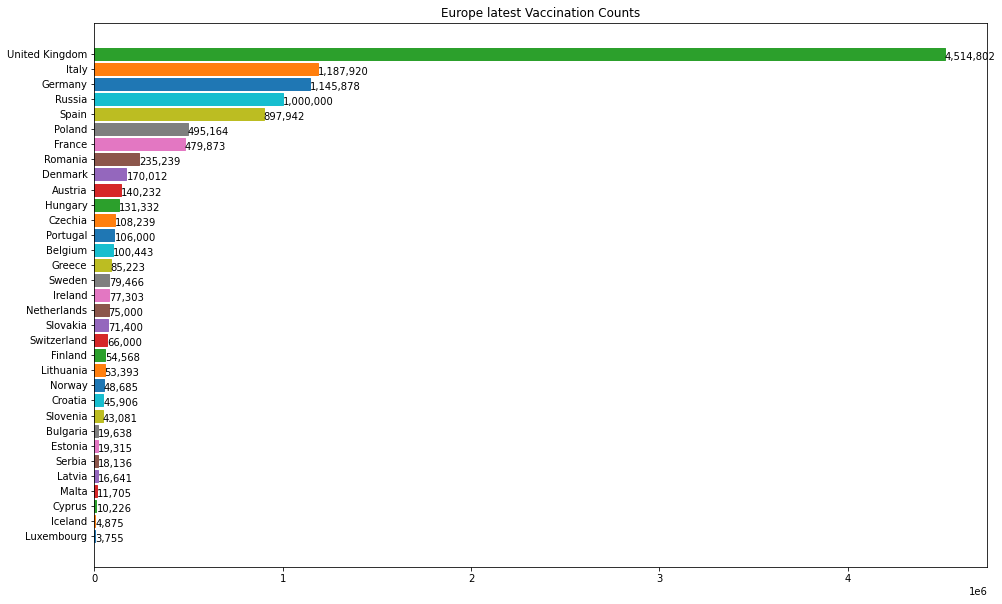

In [10]:
## Function to report on EU countries in order for whichever item is given

def EU_order(EU_Countries, df, label, title):

    x = []
    y = []
    for country in EU_Countries:
        idx = df.loc[df.location == country][label].idxmax()
        if not np.isnan(idx):
            vax = df.loc[idx][label]
    #        print(vax , ' ' , country)
            x.append(country)
            y.append(vax)

    newdf = pd.DataFrame( {'country': x, 'counter': y})
    newdf.sort_values(by='counter', inplace=True, ignore_index=True)



    fig, ax = plt.subplots(figsize = (16,10))  

    # create an array with each of the bars in 
    bars = ax.barh( newdf['country'], newdf['counter'] )

    i = 0
    for bar in bars:
        value = int(newdf.loc[i]['counter'])
        ax.annotate(f'{value:,}', 
                   xy = ( (bar.get_x() + bar.get_width() ) , bar.get_y() )
                   )
        bar.set_color(f'C{i}')
        i += 1

    plt.title(title)

    plt.show()

    fig.savefig(f'{downloads}\\{label}_OWD.png')

EU_order(EU_Countries, df, 'total_vaccinations', 'Europe latest Vaccination Counts')

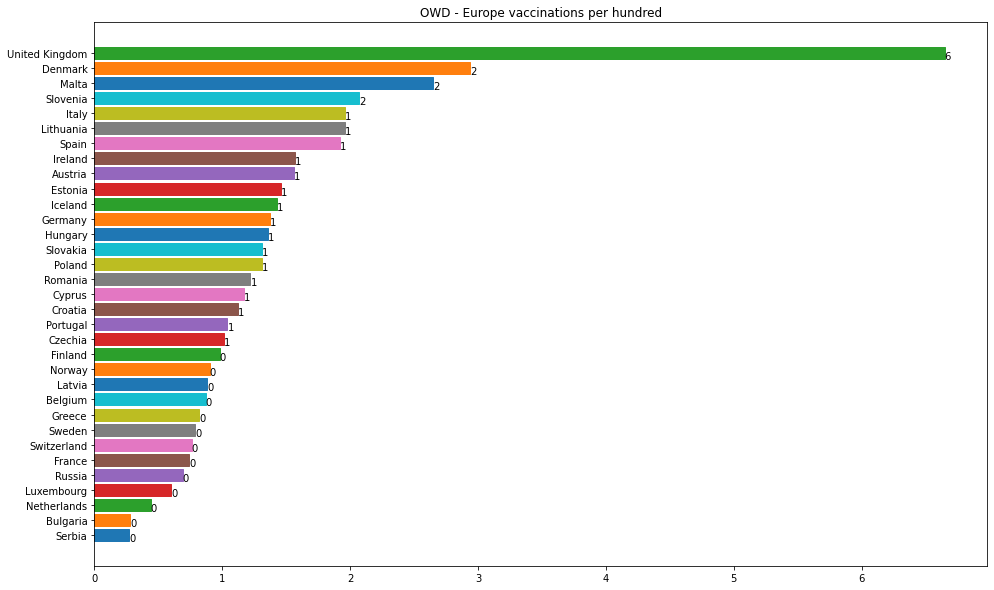

In [13]:
EU_order(EU_Countries, df, 'total_vaccinations_per_hundred', 'OWD - Europe vaccinations per hundred')

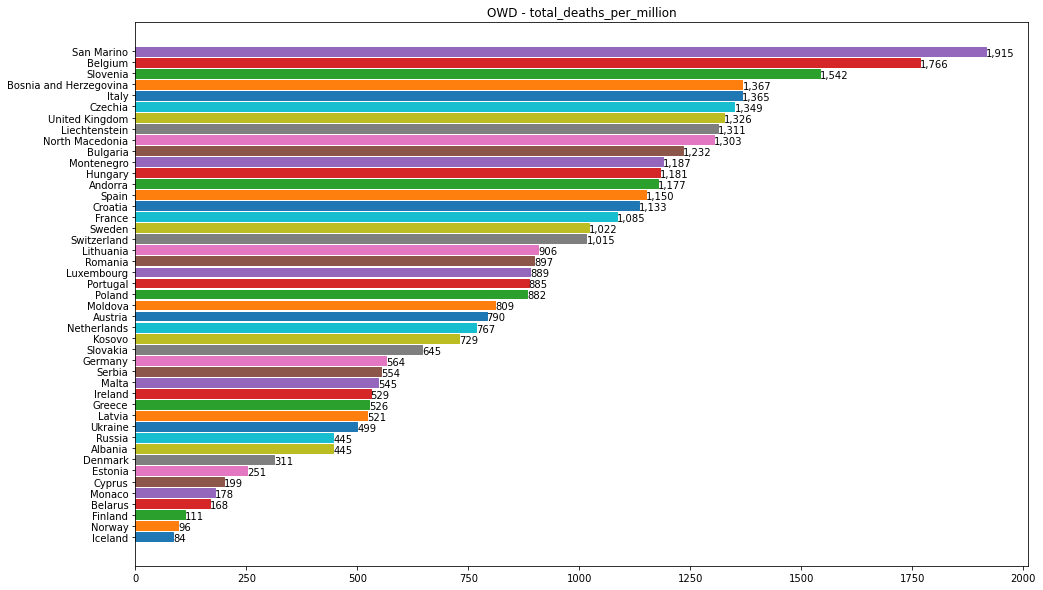

In [17]:
EU_order(EU_Countries, df, 'total_deaths_per_million', 'OWD - total_deaths_per_million')

In [ ]:
newdf = pd.DataFrame( {'country': x, 'vaccines': y})

In [ ]:
newdf.sort_values(by='vaccines',inplace=True)

In [ ]:
newdf.loc[0]['vaccines']

In [ ]:
newdf

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.loc[df.iso_code == 'DNK']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
14787,DNK,Europe,Denmark,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
14788,DNK,Europe,Denmark,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
14789,DNK,Europe,Denmark,2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
14790,DNK,Europe,Denmark,2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
14791,DNK,Europe,Denmark,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
14792,DNK,Europe,Denmark,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
14793,DNK,Europe,Denmark,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.001,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
14794,DNK,Europe,Denmark,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,0.001,0.000,0.0,0.000,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
14795,DNK,Europe,Denmark,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
14796,DNK,Europe,Denmark,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,0.001,0.000,0.0,0.000,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929
